### EDA

### Import Libraries and load the dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/home/bbm/Documents/projects/MachineLearningRating_v3.csv")
print(data.head)

/tmp/ipykernel_6831/3453167760.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/home/bbm/Documents/projects/MachineLearningRating_v3.csv")


<bound method NDFrame.head of          UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0                     145249     12827  2015-03-01 00:00:00             True   
1                     145249     12827  2015-05-01 00:00:00             True   
2                     145249     12827  2015-07-01 00:00:00             True   
3                     145255     12827  2015-05-01 00:00:00             True   
4                     145255     12827  2015-07-01 00:00:00             True   
...                      ...       ...                  ...              ...   
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:00            False   

        C

### Plot missing values

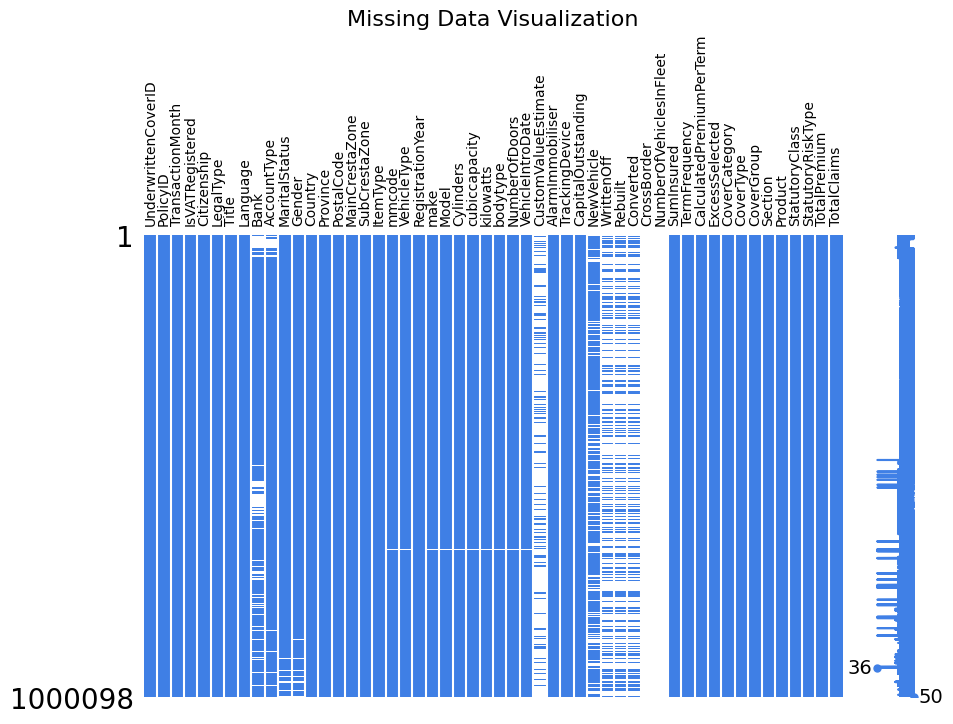

In [2]:
import missingno as msno

msno.matrix(data, figsize=(10, 6), color=(0.25, 0.5, 0.9))  # Adjust size and color
plt.title("Missing Data Visualization", fontsize=16)

plt.xticks(
    range(data.shape[1]),          
    data.columns,                  
    rotation=90, fontsize=10        
)
plt.show()

### Drop Missing values

In [7]:
numeric_data = data.select_dtypes(include=["number"])
numeric_data = numeric_data.apply(pd.to_numeric, errors="coerce")  # Convert to numeric, coercing errors to NaN
data = numeric_data.dropna()  # Drop rows with NaN values

### Data Summarization

In [3]:
print("Dataset Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province     

In [4]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

### Data Quality Assessment

In [5]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDo

### Univariate Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   TotalPremium  1000098 non-null  float64
 1   TotalClaims   1000098 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB
None


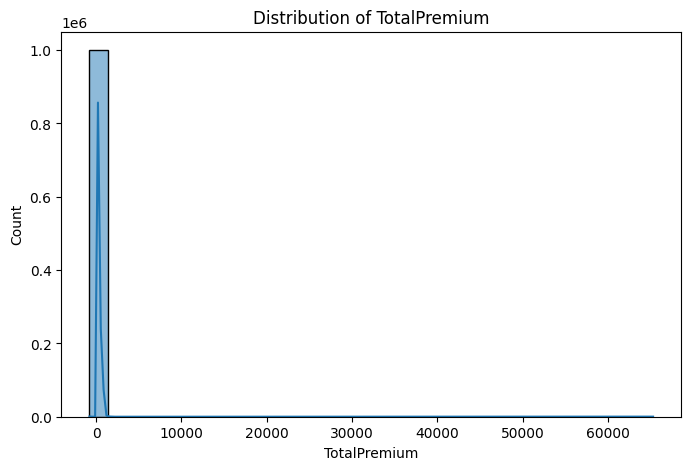

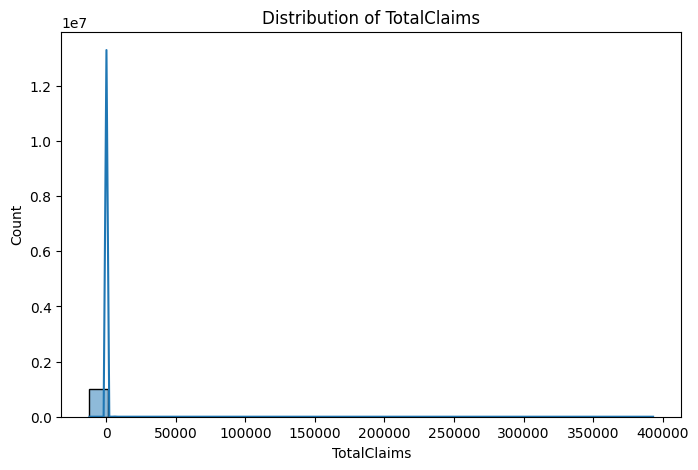

In [6]:
numerical_cols = ["TotalPremium", "TotalClaims"]
categorical_cols = [col for col in ["AutoMake", "InsuranceCoverType"] if col in data.columns]
print(data[numerical_cols].info())  # Check info for numerical columns
data[numerical_cols].dropna()
data[categorical_cols].dropna()
# Numerical Columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.show()

In [7]:
print(data.head())

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

### Bivariate Analysis

In [14]:
data["TotalPremium"] = pd.to_numeric(data["TotalPremium"], errors="coerce")
data["TotalClaims"] = pd.to_numeric(data["TotalClaims"], errors="coerce")

# Drop rows where 'TotalPremium' or 'TotalClaims' are NaN
data_cleaned = data.dropna(subset=["TotalPremium", "TotalClaims"])

numeric_data = data_cleaned.select_dtypes(include=["number"])
print("Shape of numeric_data:", numeric_data.shape)

Shape of numeric_data: (1000098, 15)


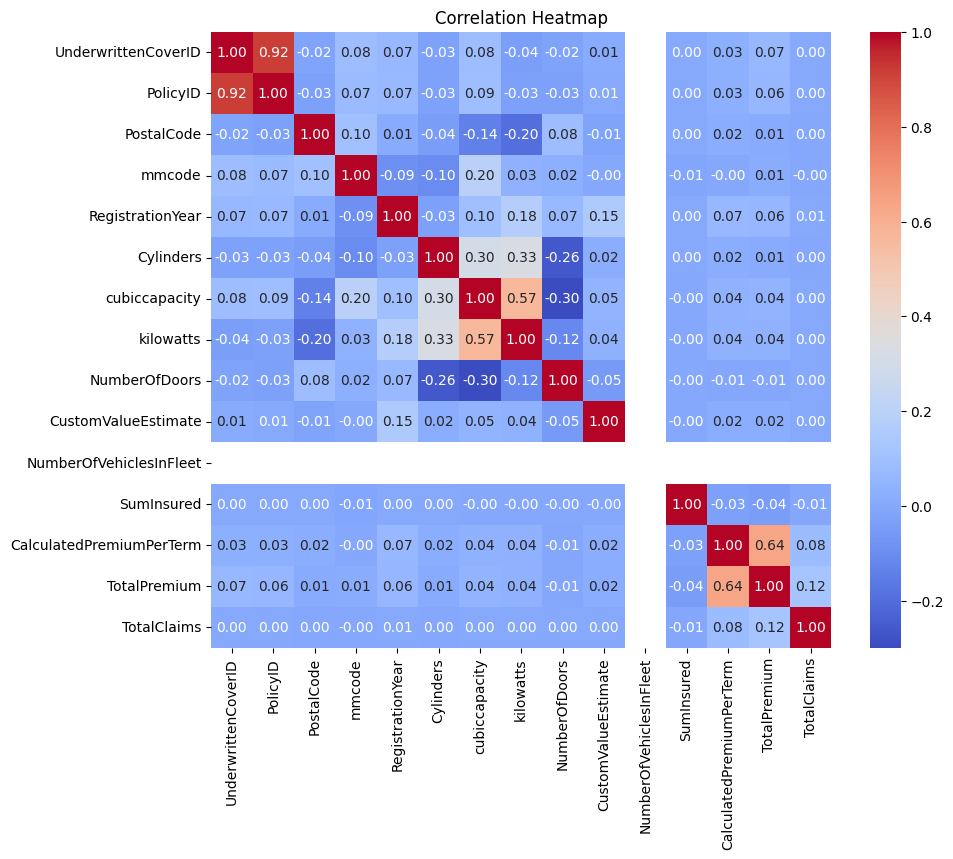

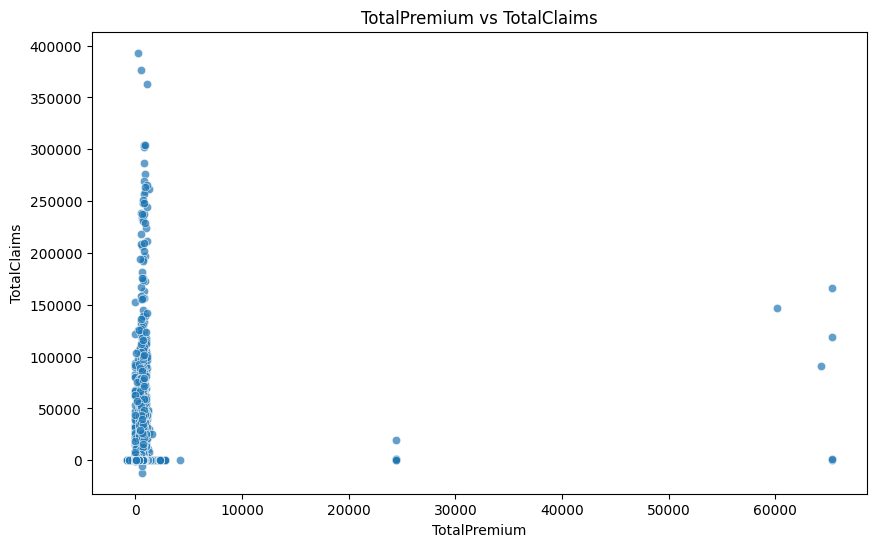

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# TotalPremium vs TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TotalPremium", y="TotalClaims", data=data, alpha=0.7)
plt.title("TotalPremium vs TotalClaims")
plt.xlabel("TotalPremium")
plt.ylabel("TotalClaims")
plt.show()

### Trends Over Geography


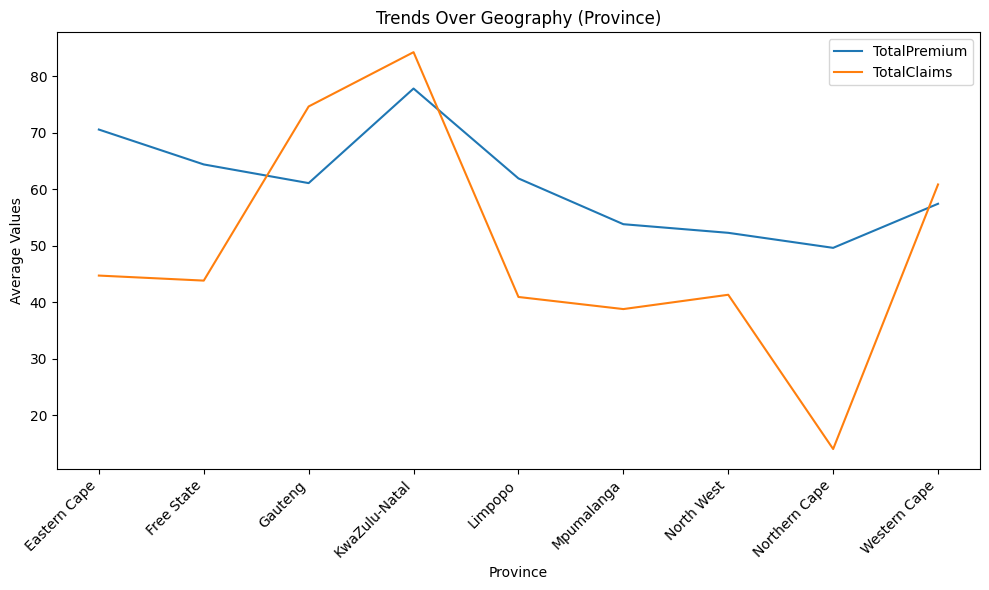

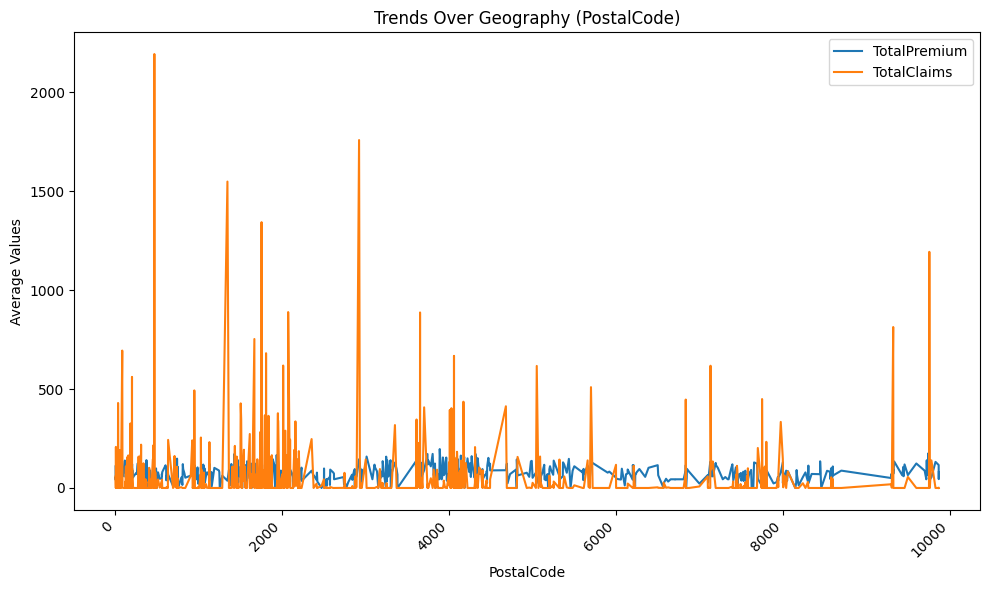

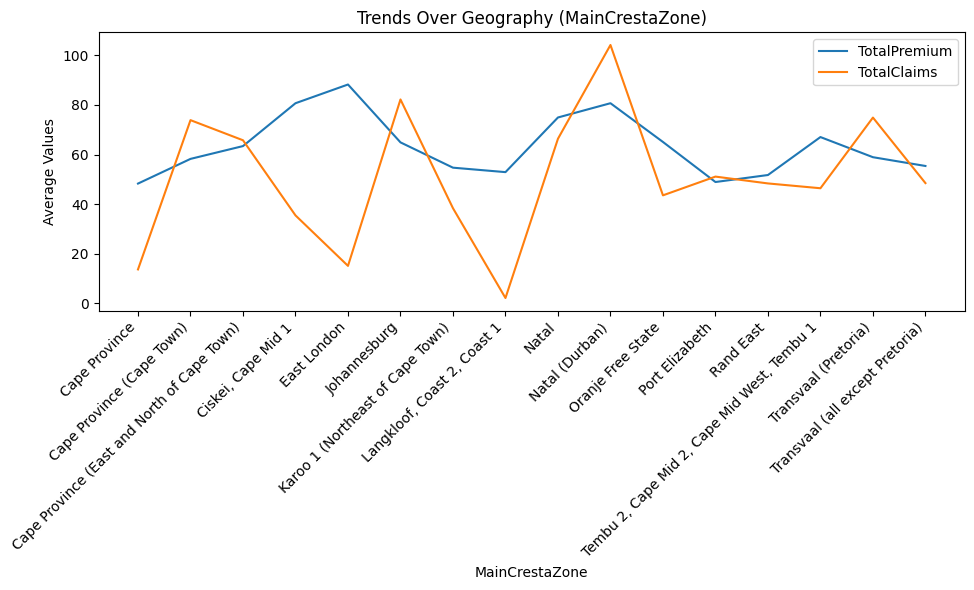

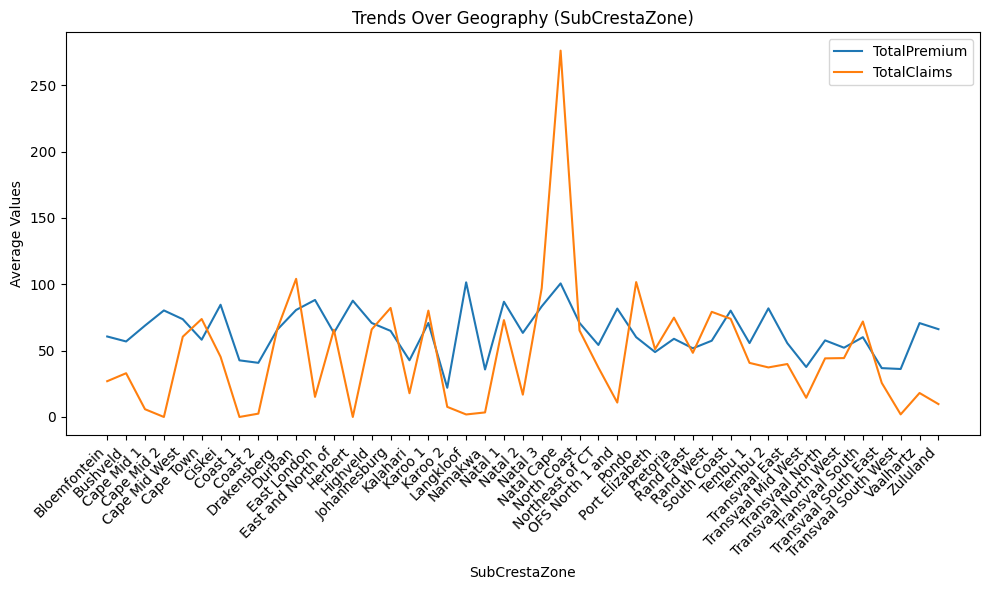

In [21]:
geo_columns = ['Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone']

for geo_col in geo_columns:
    if geo_col in data.columns:  # Check if the column exists
        try:
            geo_trends = data.groupby(geo_col)[["TotalPremium", "TotalClaims"]].mean().reset_index()
            plt.figure(figsize=(10, 6))
            sns.lineplot(x=geo_col, y="TotalPremium", data=geo_trends, label="TotalPremium")
            sns.lineplot(x=geo_col, y="TotalClaims", data=geo_trends, label="TotalClaims")
            plt.title(f"Trends Over Geography ({geo_col})")
            plt.xlabel(geo_col)
            plt.ylabel("Average Values")
            plt.xticks(rotation=45, ha='right')  
            plt.tight_layout()
            plt.legend()
            plt.show()
        except TypeError as e:
            print(f"Error creating lineplot for column '{geo_col}': {e}")
            print(f"Column type is: {data[geo_col].dtype}")
        except ValueError as e:
            print(f"Error creating lineplot for column '{geo_col}': {e}")
            print(f"Column type is: {data[geo_col].dtype}")


### Outlier Detection


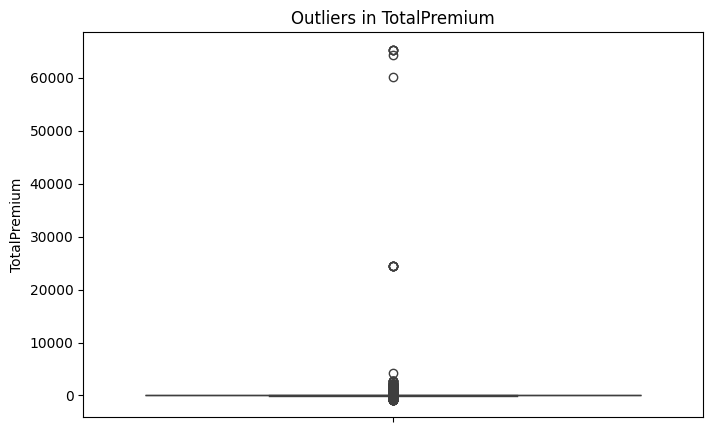

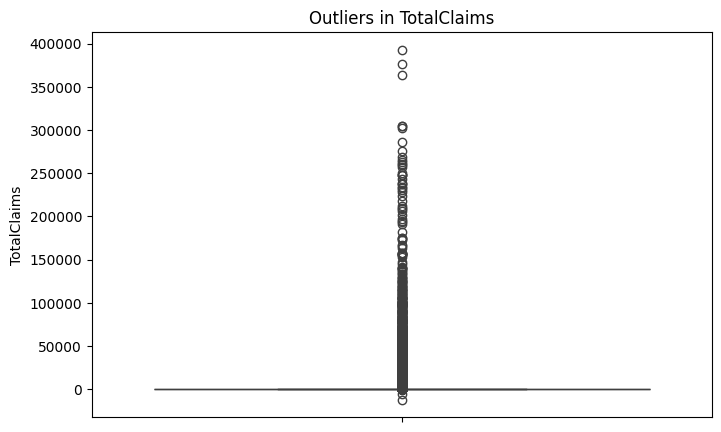

In [19]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[col])
    plt.title(f"Outliers in {col}")
    plt.show()

### Creative Visualizations


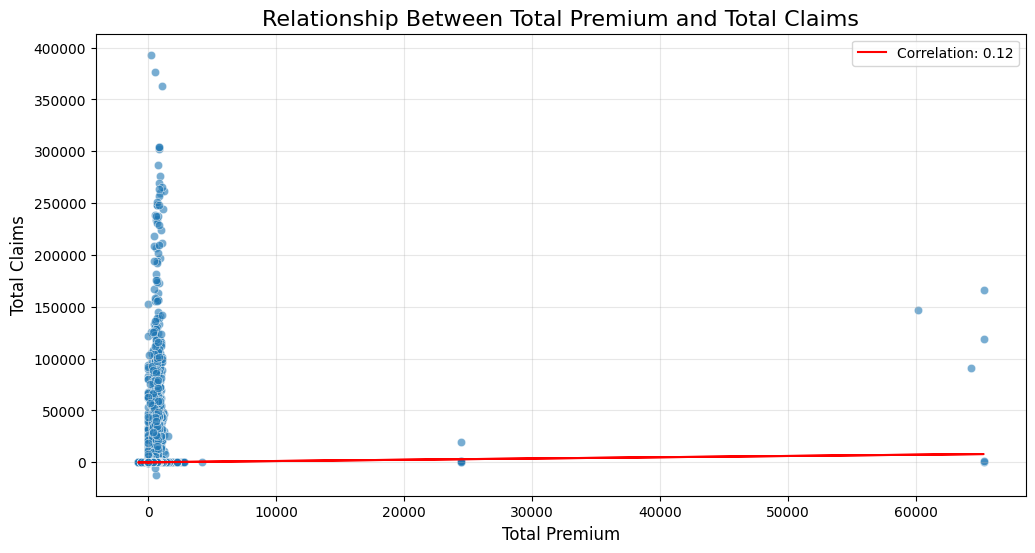

/tmp/ipykernel_6831/1432212361.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x="Province", y="TotalPremium", data=data, bins=20, palette="Set2", alpha=0.7)  # Replace with boxplot if you prefer


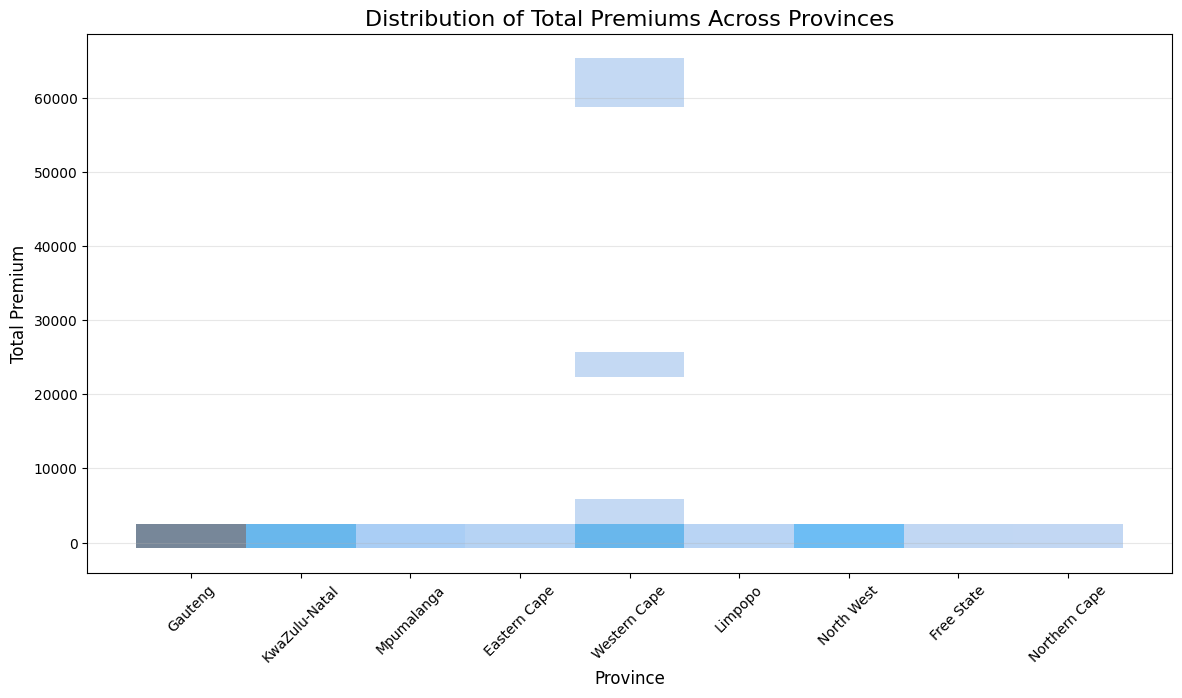

/tmp/ipykernel_6831/1432212361.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="coolwarm")


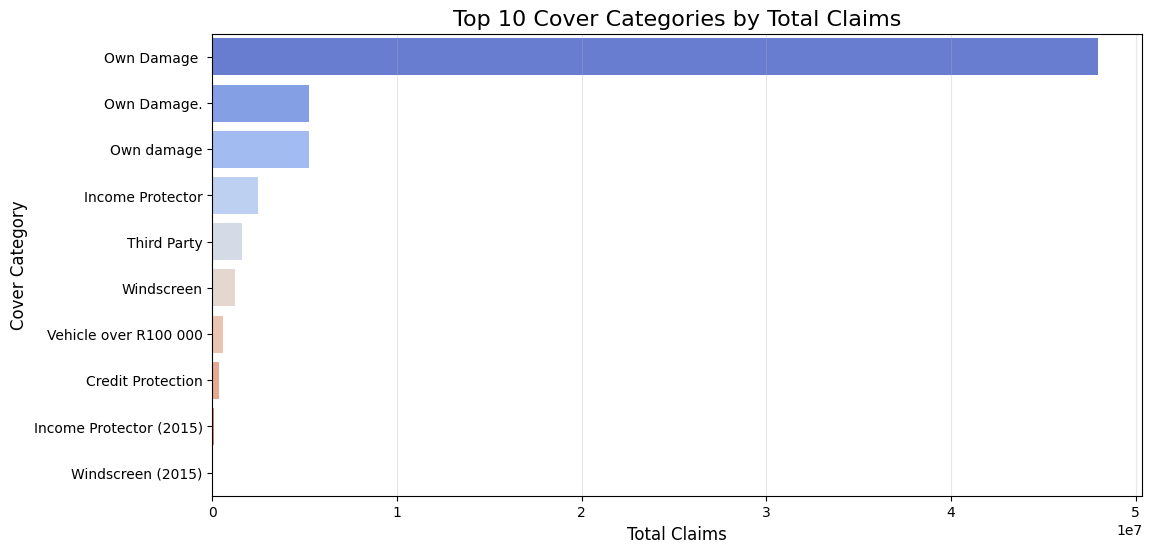

In [25]:
# Pre-calculate correlation
correlation = data['TotalPremium'].corr(data['TotalClaims'])

# 1. Total Premium vs Total Claims
plt.figure(figsize=(12, 6))
sns.scatterplot(x="TotalPremium", y="TotalClaims", data=numeric_data, alpha=0.6)
plt.plot(numeric_data['TotalPremium'], correlation * numeric_data['TotalPremium'], color='red', label=f"Correlation: {correlation:.2f}")  # Plot regression line
plt.title("Relationship Between Total Premium and Total Claims", fontsize=16)
plt.xlabel("Total Premium", fontsize=12)
plt.ylabel("Total Claims", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# 2. Distribution of Premiums Across Provinces (using histogram for potentially large provinces)
plt.figure(figsize=(14, 7))
sns.histplot(x="Province", y="TotalPremium", data=data, bins=20, palette="Set2", alpha=0.7)  # Replace with boxplot if you prefer
plt.title("Distribution of Total Premiums Across Provinces", fontsize=16)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Total Premium", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.show()

# 3. Top 10 Insurance Categories by Total Claims
# Pre-calculate data outside plot function
top_categories = data.groupby("CoverCategory")["TotalClaims"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="coolwarm")
plt.title("Top 10 Cover Categories by Total Claims", fontsize=16)
plt.xlabel("Total Claims", fontsize=12)
plt.ylabel("Cover Category", fontsize=12)
plt.grid(axis="x", alpha=0.3)
plt.show()